In [1]:
from plantcv import plantcv as pcv
import numpy as np
import os

In [2]:
pcv.params.debug='plot'

It can be useful to pull up the help pages for a module you'll be using alot like PlantCV. https://plantcv.readthedocs.io

# Read Fo and Fm

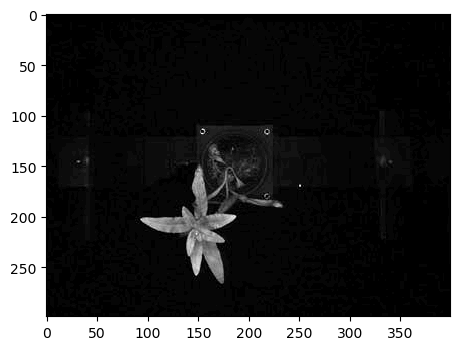

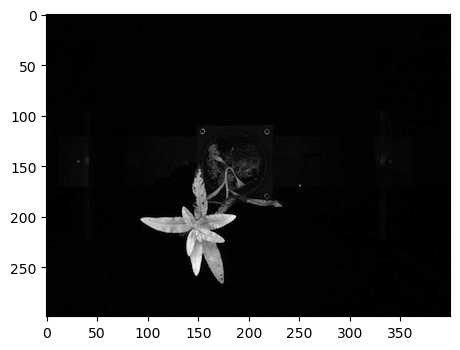

In [9]:
Fmin,_,_ = pcv.readimage('data/example/Fmin.jpg')
Fmax,_,_ = pcv.readimage('data/example/Fmax.jpg')

# What is the format of these images?

Let's check the shape and number type.

In [10]:
Fmin.shape
# Fmax.shape

(299, 400)

In [13]:
Fmin.dtype

dtype('uint8')

In [14]:
Fmax.min()

0

In [15]:
Fmax.max()

118

# How do we remove the background?

We need to determine what intensity corresponds to plant and what corresponds to background. In this case the plant is mostly brighter than the rest of the image. This means the values of those pixels is greater.

/home/dominik/Applications/miniconda3/envs/plantcv/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/dominik/Applications/miniconda3/envs/plantcv/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


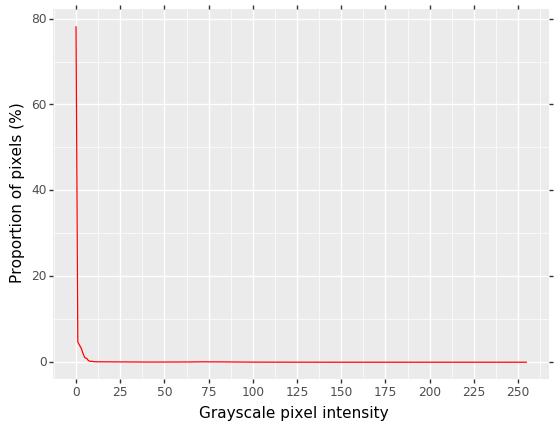

<ggplot: (8739217303133)>


In [15]:
hmax = pcv.visualize.histogram(Fmax)

/home/dominik/Applications/miniconda3/envs/plantcv/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/dominik/Applications/miniconda3/envs/plantcv/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


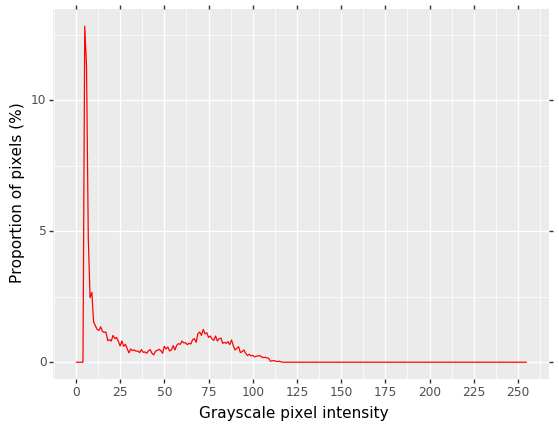

<ggplot: (8734579531529)>


In [16]:
# since the max value is 118 lets limit the histogram to 118. We can also remove the lowest values for clarity.
hmax = pcv.visualize.histogram(Fmax[np.where(np.logical_and(Fmax<118, Fmax>5))])

Now we see 2 distinct peaks - this often indicates a structural change in the image. Mess around with the exact threshold you want to use starting around 40.

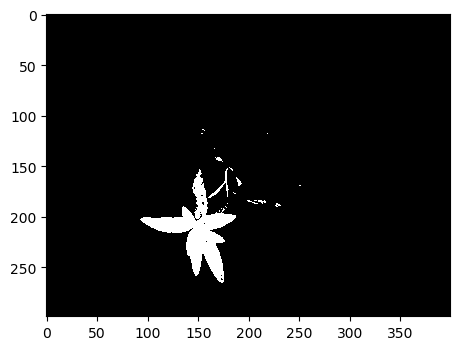

In [17]:
#Creates a binary image from a gray image based on the threshold values. The object target can be specified as dark or light.

# plantcv.threshold.binary(gray_img, threshold, max_value, object_type="light")

# returns thresholded/binary image

#     Parameters:
#         gray_img - Grayscale image data
#         threshold - Threshold value (0-255)
#         max_value - Value to apply above threshold (255 = white)
#         object_type - "light" or "dark" (default: "light"). If object is lighter than the background then standard thresholding is done. If object is darker than the background then inverse thresholding is done.


mask = pcv.threshold.binary(Fmax, 45 , 255, 'light')

Now we have some left over noise we don't want to include as plant. There are numerous ways of dealing with these spots. For example pcv.fill(), pcv.erode(), pcv.dilate(), pcv.fill_holes()

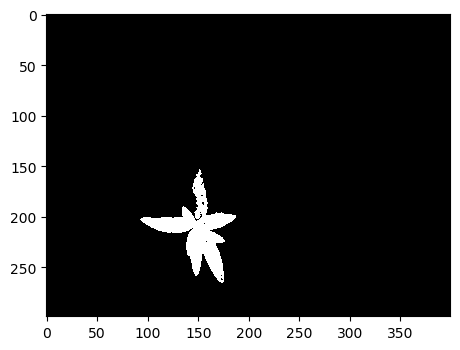

In [19]:
# Identifies objects and fills objects that are less than specified size

# plantcv.fill(bin_img, size)

# returns fill_image

#     Parameters:
#         bin_img - Binary image data
#         size - minimum object area size in pixels (integer), smaller objects will be filled
#     Context:
#         Used to reduce image noise


fill = pcv.fill(mask, 200)

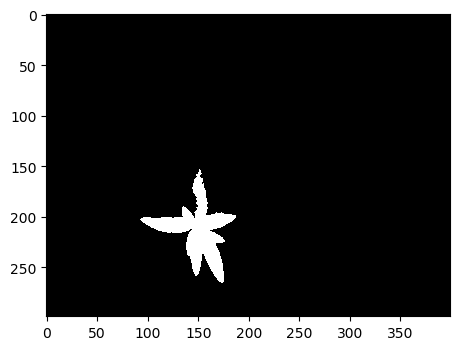

In [20]:
# Cleans pepper noise (black holes) by doing a flood fill

# plantcv.fill_holes(bin_img)

# returns fill_image

#     Parameters:
#         bin_img - Binary image data
#     Context:
#         Used to reduce image noise
ffill = pcv.fill_holes(fill)

In [21]:
finalmask  = ffill